# Разделение выборки на три класса

In [8]:
import numpy as np
import random

from net.layer import Dense, Input, ReLu, Softmax, LossSoftmax, LossMSE, Sigmoid
from net.network import Network
from net.back_propogation import BackPropagation
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [13]:
# Задача взята http://cs231n.github.io/neural-networks-case-study/
N = 100 # Количество точек в классе
D = 2 # Размерность
K = 3 # Количество классов
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8') 
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # радиус
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
y = np.eye(3)[y] # One hot encoding

Посмотрим на сгенерированные данные

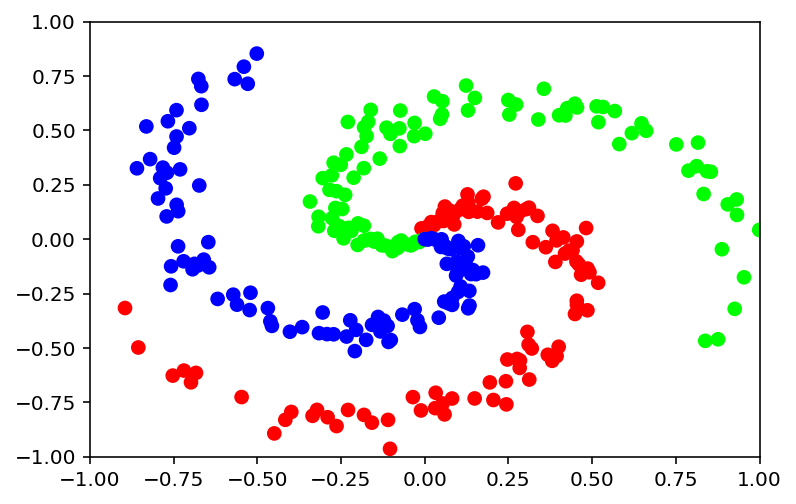

In [14]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

Полученная выборка линейно не разделима. Попробуем ее разделить с помощью нейронной сети, с одним скрытым слоем. 

In [36]:
layers = [Input(2),      # На вход вектор из двух координат x и y
          Dense(100),    # Скрытый слой, со 100 нейронами
          ReLu(),        # Функция активации, обеспечивающая нелинейность
          Dense(3),      # Выходной слой, показывает метку класса
          Softmax(),     # Слой для перевода непонятных едениц измерения в вероятности
          LossSoftmax()] # Слой для подсчета ошибки

net = Network(layers)
solver = BackPropagation(net)

In [39]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
solver.fit(X, y, n_epoch=10000, l_rate=1, l_rate_decay_n_epoch=10000, display=True)

Epoch 0: loss = 0.5525080116357873
Epoch 100: loss = 0.51968767132157
Epoch 200: loss = 0.4902797879736728
Epoch 300: loss = 0.46266163573716074
Epoch 400: loss = 0.43728662370272126
Epoch 500: loss = 0.41432467779352433
Epoch 600: loss = 0.3937018560521227
Epoch 700: loss = 0.37522733138882947
Epoch 800: loss = 0.35862438935321156
Epoch 900: loss = 0.34361733014538137
Epoch 1000: loss = 0.32996524373321
Epoch 1100: loss = 0.3174332056177375
Epoch 1200: loss = 0.30587952762137616
Epoch 1300: loss = 0.2950262765358349
Epoch 1400: loss = 0.28475498170464336
Epoch 1500: loss = 0.27510329149754836
Epoch 1600: loss = 0.2659722975868844
Epoch 1700: loss = 0.25721831943416806
Epoch 1800: loss = 0.24893472856903923
Epoch 1900: loss = 0.24106566944188615
Epoch 2000: loss = 0.23351117656495565
Epoch 2100: loss = 0.22624598467782767
Epoch 2200: loss = 0.21933369860989757
Epoch 2300: loss = 0.2127385860443289
Epoch 2400: loss = 0.20639781812072264
Epoch 2500: loss = 0.2001749401546103
Epoch 2600: 

Ошибка уменьшается, значит гиперпараметры выбраны правильно, построим график зависимости ошибки от эпохи

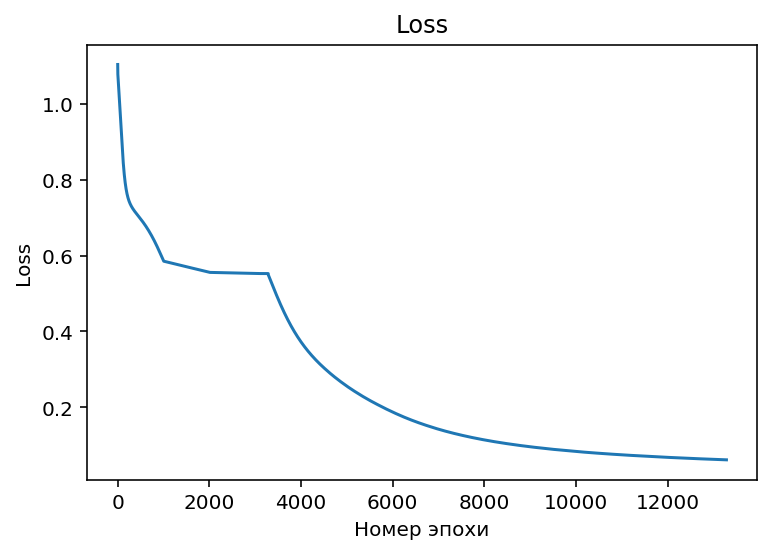

In [33]:
losses = solver.get_loss()

fig, ax = plt.subplots()
plt.plot(losses)
ax.set_xlabel('Номер эпохи')
ax.set_ylabel('Loss')
ax.set_title('Loss')
plt.show()

Проверим, как нейросеть выборку

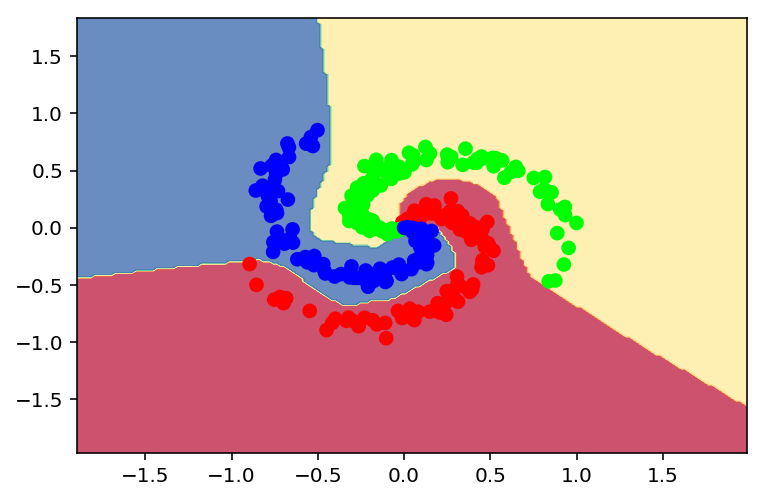

In [34]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = solver.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()